<a href="https://colab.research.google.com/github/meena25091992/Meenakshi-Hotel-Booking/blob/main/Individual_Notebook_Stock_Price_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem Statement:-

>Yes Bank is a well-known bank in the Indian financial domain. Since 2018,it has been in the news because of the fraud case involving Rana Kapoor.Owing to this fact, it was interesting to see how that impacted the stock prices of the company and whether Time series models or any other predictive models can do justice to such situations. This dataset has monthly stock prices of the bank since its inception and includes closing, starting, highest, and lowest
stock prices of every month. 



# Business Goal:-

> The main objective is to predict the stock's closing price of the month.




In [16]:
# Importing the libraries

import numpy as np                #  Import numpy for mathematical calculation
import pandas as pd               #  Import pandas for data wrangling
import matplotlib.pyplot as plt   #  Import matplotlib and seaborn for Data Visualization
import seaborn as sns
from datetime import datetime     # Import datetime to convert date column into proper format

# This method is used to split the dataset into training and test set while buliding the model
from sklearn.model_selection import train_test_split

# Import different models for prediction
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet 

# import matrix module to evaluate the performance of the model
from sklearn.metrics import *
import pandas.util.testing as tm

# import variance_inflation_factor method to reduce multicollinearity in independent variables
from statsmodels.stats.outliers_influence import variance_inflation_factor
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [17]:
# Mount google drive

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [18]:
# Importing Dataset and read files

file_path = '/content/drive/MyDrive/Meenakshi_Supervised_ML_Capestone_Project/data_YesBank_StockPrices.csv'
yes_bank_df = pd.read_csv(file_path)

yes_bank_df.shape # fetching number of rows and columns from dataframe

(185, 5)

In [19]:
# fetching first five rows from dataset using head() function

yes_bank_df.head()

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41


In [20]:
# fetch basic information about the features in our dataframe

yes_bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    185 non-null    object 
 1   Open    185 non-null    float64
 2   High    185 non-null    float64
 3   Low     185 non-null    float64
 4   Close   185 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.4+ KB


In [21]:
# creating a copy of dataframe so that our original dataset not reflect 

stock_price_df = yes_bank_df.copy()


# Checking for NULL and Duplicate values

In [22]:
# check if there is any null value or not

stock_price_df.isnull().sum()

Date     0
Open     0
High     0
Low      0
Close    0
dtype: int64

* There is no NULL value in the dataset

In [23]:
# check for any duplicate row or not
len(stock_price_df[stock_price_df.duplicated()])

0

* There is no DUPLICATE value in the dataset

# Dataset Description
  We have a dataset of YES BANK which contain monthly stock prices of bank since its opening.It contain multiple features like:-


*   **Date :-** Date denotes the date of investment(date contains month and year for a particular price) (Object)
* **Open :-** means the price at which a stock started trading   (Numerical).
*  **High :-**The high is the highest price at which a stock traded during a period (Numerical).
*  **Low :-**The low is the minimum price at which a stock traded during a period (Numerical).
*  **Close :-** The closing price refers to a stock's trading price closed at the end of a trading day (Numerical).It's a depenedent variable which we need to predict from our respetive ML models.The closing price is calculated as the weighted average price of the last 30 minutes, i.e. from 3:00 PM to 3:30 PM in case of equity.



  

In [24]:
""" The describe() function computes a summary of statistics pertaining to the DataFrame columns.
    This function gives the mean, std and IQR values. And, function excludes the character columns 
    and given summary about numeric columns.
"""
stock_price_df.describe(include='all') 

,Date,Open,High,Low,Close
count,185,185.000000,185.000000,185.000000,185.000000
unique,185,NaN,NaN,NaN,NaN
top,Jul-05,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN
mean,NaN,105.541405,116.104324,94.947838,105.204703
std,NaN,98.879850,106.333497,91.219415,98.583153
min,NaN,10.000000,11.240000,5.550000,9.980000
25%,NaN,33.800000,36.140000,28.510000,33.450000
50%,NaN,62.980000,72.550000,58.000000,62.540000
75%,NaN,153.000000,169.190000,138.350000,153.300000


In [25]:
# check the format of "Date" column

stock_price_df['Date']

0      Jul-05
1      Aug-05
2      Sep-05
3      Oct-05
4      Nov-05
        ...  
180    Jul-20
181    Aug-20
182    Sep-20
183    Oct-20
184    Nov-20
Name: Date, Length: 185, dtype: object

*  
From the above output,We have seen that the format of Date is **"MMMM-YY"** .So we need to convert in proper date format **"YYYY-MM-DD"**.Also,convert **year** into numeric format .




In [26]:
# Converting 'Date' into datetime - 'YYYY-MM-DD' format
# Using Pandas to_datetime() method helps to convert string Date time into Python Date time object
# Apply lambda function to convert  all values of date column to proper format 

stock_price_df['Date'] = pd.to_datetime(stock_price_df['Date'].apply(lambda x: datetime.strptime(x, '%b-%y')))
stock_price_df['Date'] 

0     2005-07-01
1     2005-08-01
2     2005-09-01
3     2005-10-01
4     2005-11-01
         ...    
180   2020-07-01
181   2020-08-01
182   2020-09-01
183   2020-10-01
184   2020-11-01
Name: Date, Length: 185, dtype: datetime64[ns]



*   But the problem is that our ML model like Linear Regression doesn't work on "Date" data.So we need to convert it into numerical column.But, numerical date have no use in our respetive dataframe to predict the goal .So,make the "Date" column as dataframe index .



In [27]:
# Make "Date" column as index of the dataframe

stock_price_df.set_index('Date', inplace=True)

In [28]:
# check the changes 

stock_price_df.tail()

,Open,High,Low,Close
Date,,,,
2020-07-01,25.60,28.30,11.10,11.95
2020-08-01,12.00,17.16,11.85,14.37
2020-09-01,14.30,15.34,12.75,13.15
2020-10-01,13.30,14.01,12.11,12.42
2020-11-01,12.41,14.90,12.21,14.67


In [29]:
# Now only 4 columns are left in the respective dataframe

stock_price_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 185 entries, 2005-07-01 to 2020-11-01
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    185 non-null    float64
 1   High    185 non-null    float64
 2   Low     185 non-null    float64
 3   Close   185 non-null    float64
dtypes: float64(4)
memory usage: 7.2 KB


* There are only 4 columns left in the dataset.

# Exploratory Data Analysis

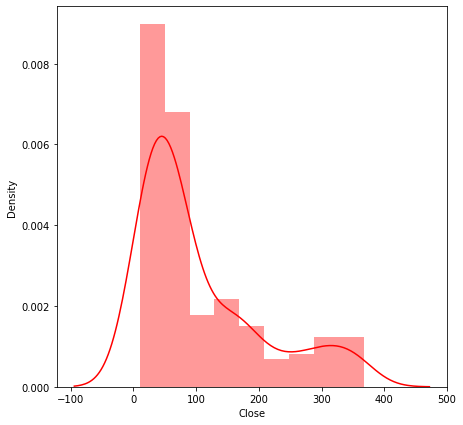

In [30]:
#  Plot the histogram to see Dependent variable 'Close' distribution whcih we need to predict later 

plt.figure(figsize=(7,7))
sns.distplot(stock_price_df['Close'],color="r")

*  The above distibution is not a **Normal Distribution**.It's a **Positively Skewed Distribution** .So,We need to convert it into Normal Distribution using **Log Tranformation**.




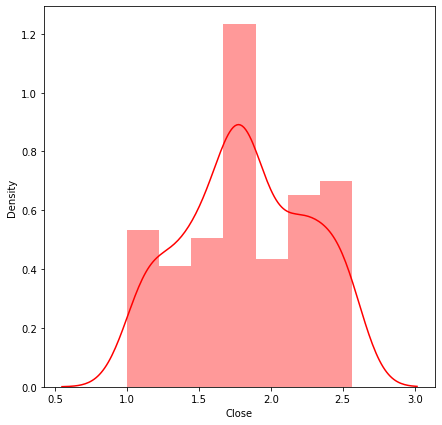

In [31]:
# Dependent variable 'Close' price of a stock

plt.figure(figsize=(7,7))
sns.distplot(np.log10(stock_price_df['Close']),color="r")

* It is not a perfect Normal Distribution Graph but it looks like    Normal Distribution Graph.

# Numerical Features

In [32]:
# Check the numerical columns in dataset

numeric_features = stock_price_df.describe().columns
numeric_features

Index(['Open', 'High', 'Low', 'Close'], dtype='object')

*   All the columns are numerical in the dataset.



# Checking the Distribution and Outliers

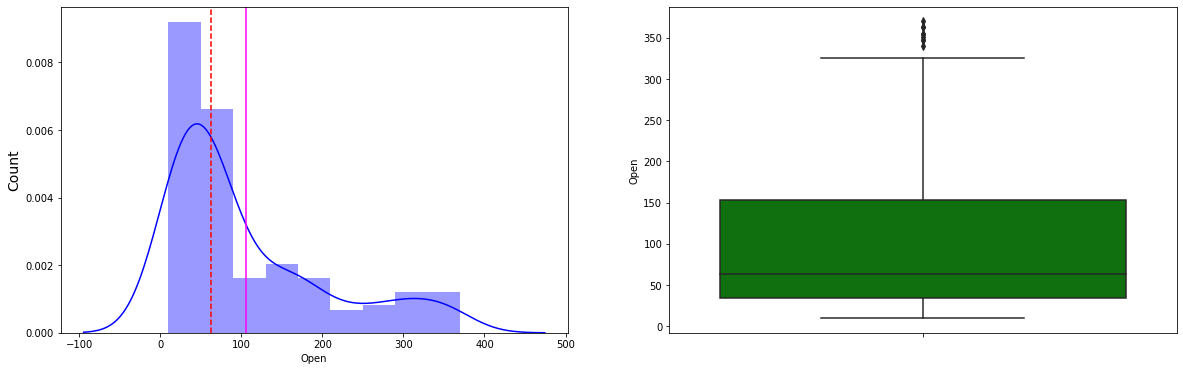

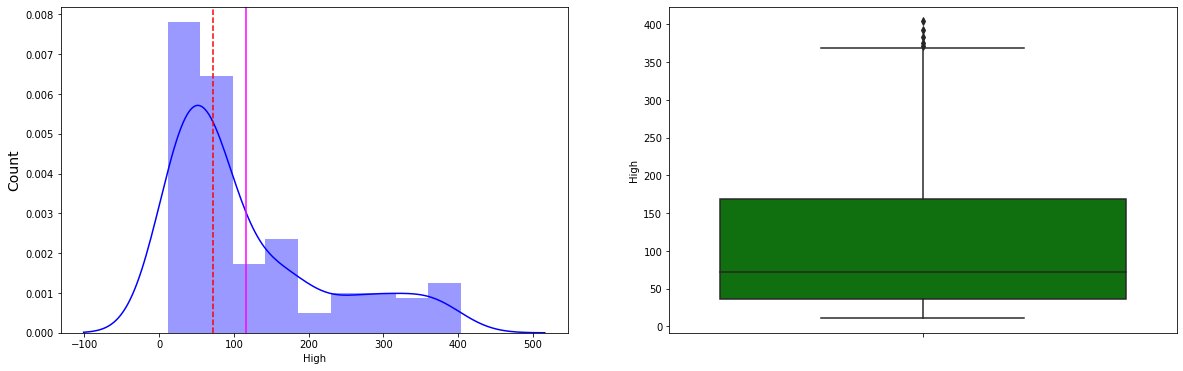

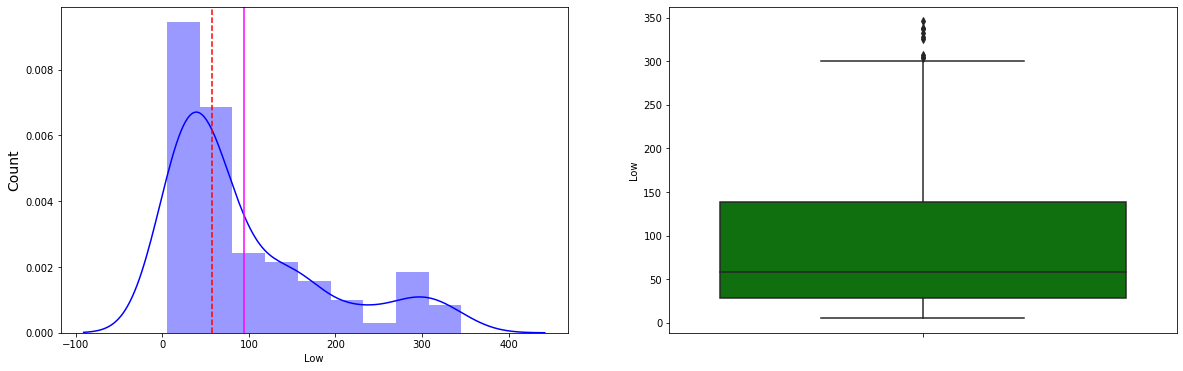

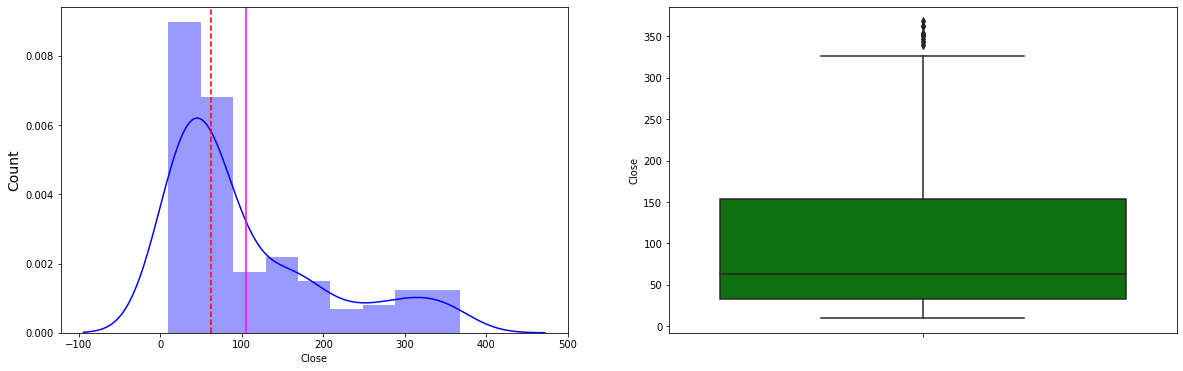

In [33]:
# plot a bar plot for each numerical feature and see the ditriution is normal or not

for col in numeric_features:
    plt.figure(figsize=(20, 6))
    plt.subplot(1, 2, 1)
    sns.distplot(stock_price_df[col], color="blue")

# The Axes. axvline() function in axes module of matplotlib library is used to add a vertical line across the axis.
# It will show where the "mean" and "median" lie for each plot  

    plt.ylabel("Count", size=14)
    plt.axvline(stock_price_df[col].mean(),color='magenta',linewidth=1.5)
    plt.axvline(stock_price_df[col].median(),color='red',linestyle="dashed",linewidth=1.5)

# create boxplot to see if there is any outliers in any column or not
# use subplot() function of matplotlib to create boxplot in this figure itself
# box plot is used to check outliers are present in respective features or not

    plt.subplot(1, 2, 2)
    sns.boxplot(y=stock_price_df[col], color="green")
 
plt.show()

* The above graph shows that they are not a normal distribution curve.
* The mean and median should be equal for perfect normal distribution curve.But, mean is not equal to median as there is not a perfect normal distribution curve.
* We need to convert all the features to normal distribution using log tranformation.
* Outliers are present in each column.By, converting our features to normal distribution using log tranform .We can remove ouliers from the dataset.



# Log tranformation to convert features to Normal Distribution

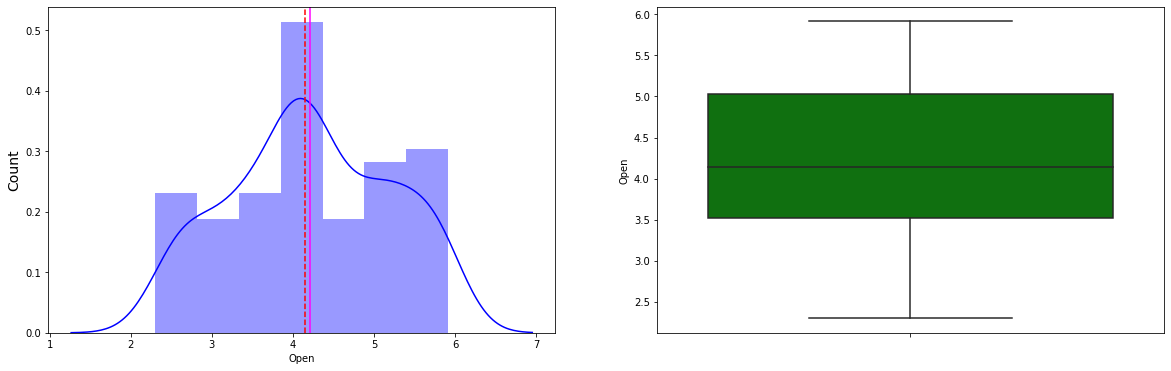

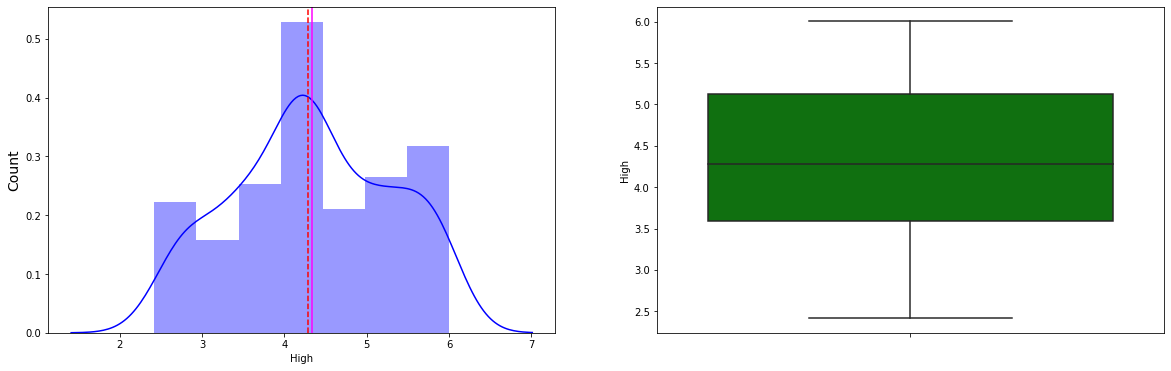

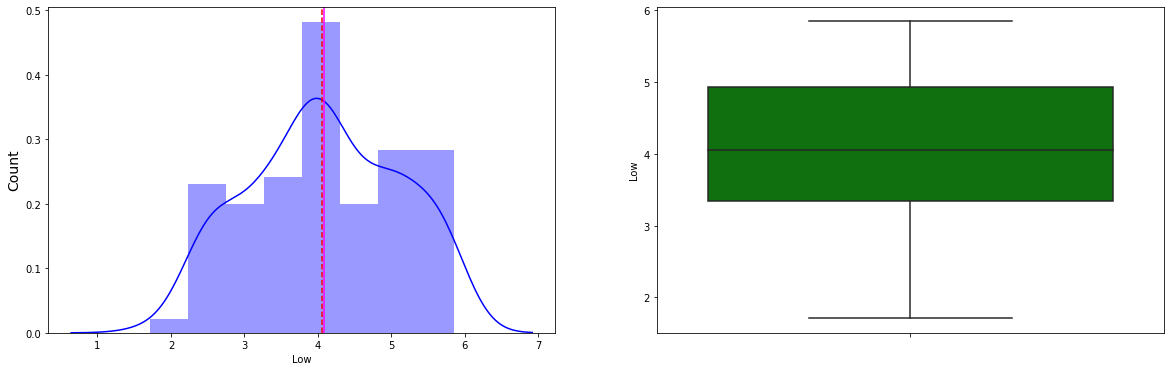

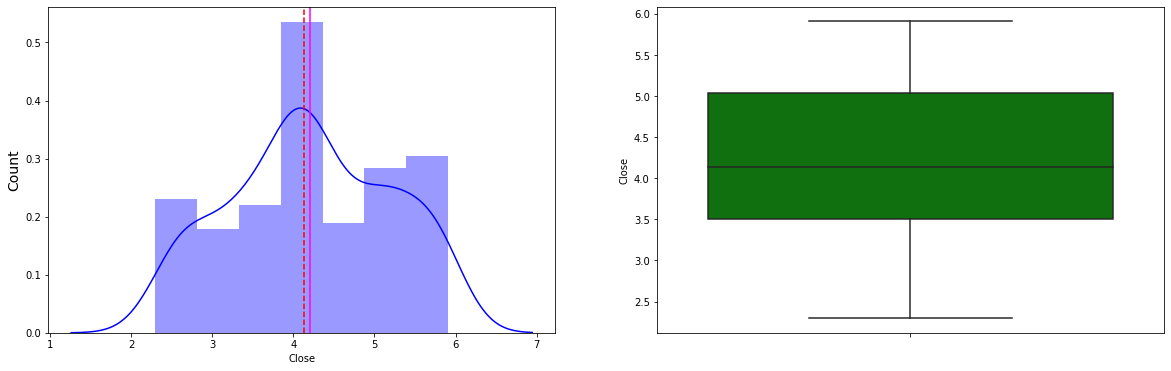

In [34]:
# log tranformation to convert a column to normal distribution

for col in numeric_features:
    plt.figure(figsize=(20, 6))
    plt.subplot(1, 2, 1)

# np.log() is a method in numpy library to convert our dataset values into log transformation to get a normal distribution curve

    feature_to_log = np.log(stock_price_df[col])  # assign log tranformation value into a variable 
    sns.distplot(feature_to_log, color="blue")

# The Axes. axvline() function in axes module of matplotlib library is used to add a vertical line across the axis.
# It will show where the "mean" and "median" lie for each plot  

    plt.ylabel("Count", size=14)
    plt.axvline(feature_to_log.mean(),color='magenta',linewidth=1.5)
    plt.axvline(feature_to_log.median(),color='red',linestyle="dashed",linewidth=1.5)

# create boxplot to see if there is any outliers in any column or not
# use subplot() function of matplotlib to create boxplot in this figure itself

    plt.subplot(1, 2, 2)
    sns.boxplot(y=feature_to_log, color="green")
 
plt.show()

* From the above graph, We see that now our graph is nearly close to normal distribution.
* Mean is nearly equal to median.
* From the box plot, We see that outliers are removed by log transformation.


# Check how the closing stock price vary after fraud case 2018

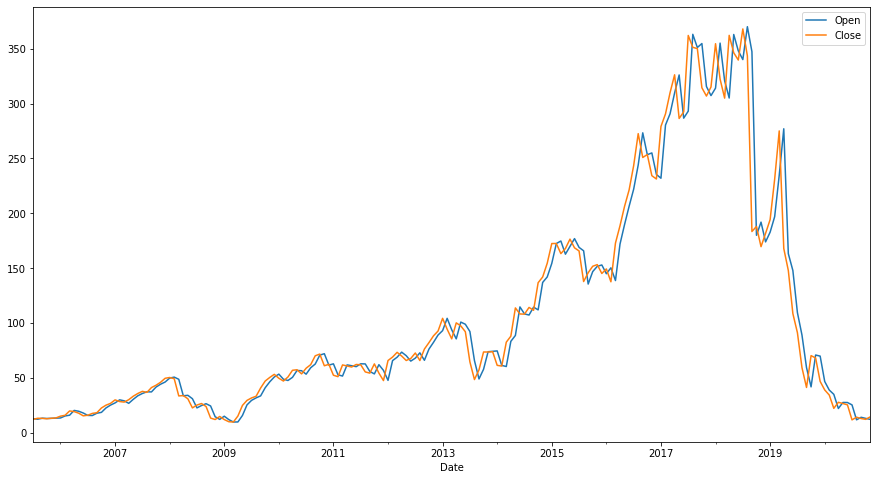

In [35]:
# Line plot to see how the "Open" and "Close" stock price of Yes Bank is affected after 2018 fraud case

stock_price_df[['Open','Close']].plot(kind='line',figsize=(15,8))

* From the above scatter graph ,We conclude that the opening and closing stock price is keep on increasing till 2018.
* But after 2018 , the stock price is keep on decreasing due the fraud case involving Rana Kapoor.

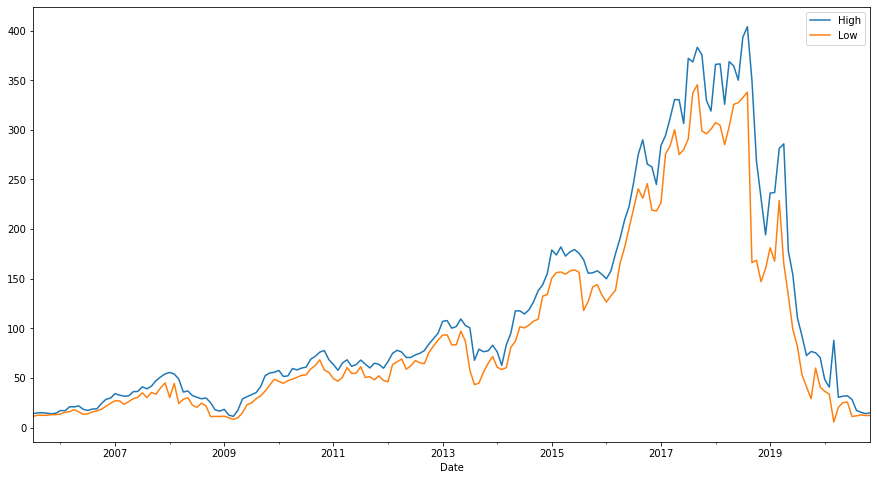

In [36]:
# Check how the "High" and "Low" stock are affected after 2018 fraud case


stock_price_df[['High','Low']].plot(kind='line',figsize=(15,8))

* From the above scatter graph ,We conclude that the highest and lowest stock price is keep on increasing till 2018.
* But after 2018 , the stock price is keep on decreasing due the fraud case involving Rana Kapoor.

# Creating dependent and independent varaiables


In [37]:
# Creating a dependent variable i.e 'Y'

dependent_variable = stock_price_df.iloc[:,-1]  # use iloc method of the dataframe to select only dependent variable i.e. last column
dependent_variable.values   # print column values into an array

array([ 12.46,  13.42,  13.3 ,  12.99,  13.41,  13.71,  15.33,  16.12,
        20.08,  19.49,  18.03,  15.62,  16.16,  17.84,  18.46,  22.78,
        25.32,  26.97,  30.16,  28.63,  28.14,  30.31,  33.51,  35.98,
        37.93,  36.99,  41.36,  43.48,  46.18,  49.81,  50.54,  49.42,
        33.75,  34.06,  31.13,  22.85,  25.45,  26.83,  24.13,  13.58,
        12.26,  15.03,  12.24,  10.26,   9.98,  15.45,  25.12,  29.68,
        31.93,  33.45,  40.99,  47.31,  50.57,  53.41,  49.84,  47.32,
        50.97,  57.1 ,  57.57,  53.83,  58.99,  62.22,  70.3 ,  71.86,
        61.21,  62.54,  52.59,  51.29,  61.98,  61.02,  60.07,  62.38,
        62.13,  55.61,  54.5 ,  62.9 ,  54.49,  47.72,  65.99,  69.14,
        73.46,  70.07,  66.02,  67.83,  72.85,  65.97,  76.44,  82.29,
        88.48,  92.84, 104.41,  94.5 ,  85.71, 100.28,  97.49,  92.2 ,
        64.76,  48.65,  57.5 ,  73.76,  73.74,  74.02,  61.59,  60.95,
        82.7 ,  88.14, 113.89, 108.38, 108.21, 114.33, 111.7 , 136.83,
      

In [38]:
# Create a list of independent variables i.e x1,x2,x3,.....xn

independent_variables = stock_price_df.iloc[:,:-1] # use iloc method of the dataframe to select all independent variable i.e. except last column
independent_variables

,Open,High,Low
Date,,,
2005-07-01,13.00,14.00,11.25
2005-08-01,12.58,14.88,12.55
2005-09-01,13.48,14.87,12.27
2005-10-01,13.20,14.47,12.40
2005-11-01,13.35,13.88,12.88
...,...,...,...
2020-07-01,25.60,28.30,11.10
2020-08-01,12.00,17.16,11.85
2020-09-01,14.30,15.34,12.75


# Use Heat Map to show correlation between all variables

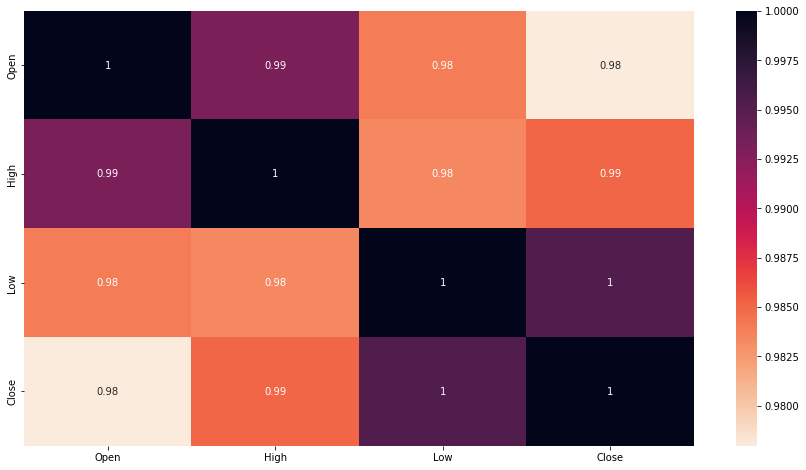

In [39]:
# Correlation between each and every column of the dataframe

plt.figure(figsize=(15,8))
correlation = stock_price_df.corr()
sns.heatmap(abs(correlation), annot=True, cmap='rocket_r')

* The above heat map shows that all the features are highly correlated with each other.

# Plot the entire dataframe using PairGrid and checking the relation between variables

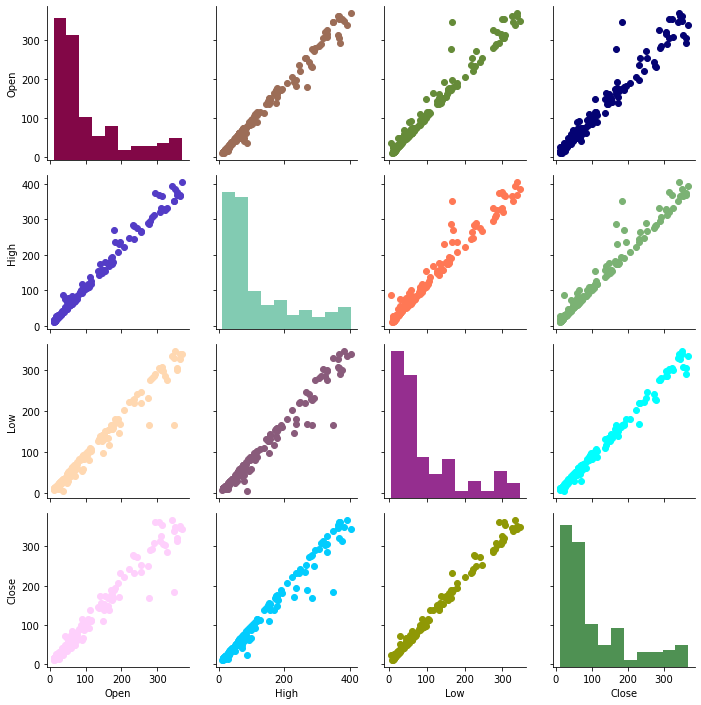

In [40]:
# It plot each and every column of our df with other column

colors = iter(['xkcd:red purple', 'xkcd:pale teal', 'xkcd:warm purple',
       'xkcd:light forest green', 'xkcd:blue with a hint of purple',
       'xkcd:light peach', 'xkcd:dusky purple', 'xkcd:pale mauve',
       'xkcd:bright sky blue', 'xkcd:baby poop green', 'xkcd:brownish',
       'xkcd:moss green', 'xkcd:deep blue', 'xkcd:melon',
       'xkcd:faded green', 'xkcd:cyan', 'xkcd:brown green',
       'xkcd:purple blue', 'xkcd:baby shit green', 'xkcd:greyish blue'])

def my_scatter(x,y, **kwargs):
    kwargs['color'] = next(colors)
    plt.scatter(x,y, **kwargs)

def my_hist(x, **kwargs):
    kwargs['color'] = next(colors)
    plt.hist(x, **kwargs)

g = sns.PairGrid(stock_price_df)
g.map_diag(my_hist)
g.map_offdiag(my_scatter)

* The above pair plot shows high correlation among variables.

# Checking correlation between dependent vs independent variable

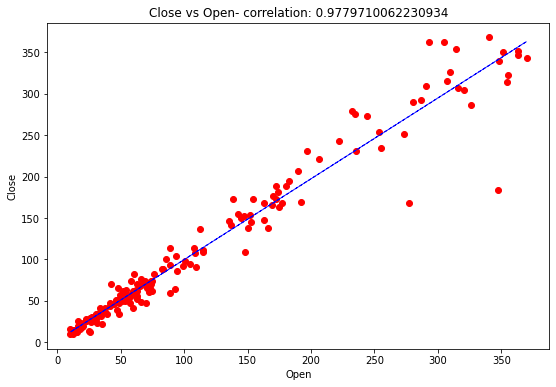

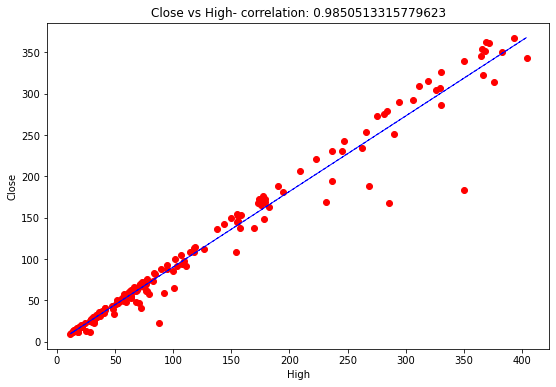

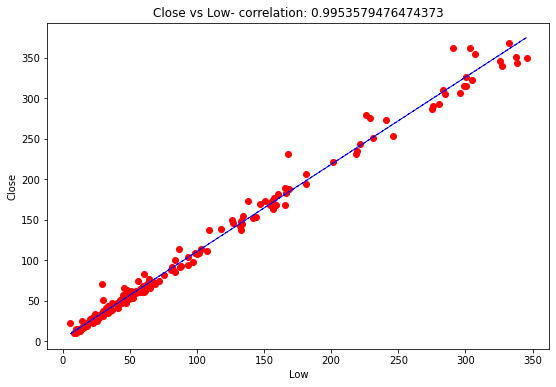

In [41]:
# find correlation betweeen different dependent variables "Close" to all independent variable

for col in numeric_features[0:-1]:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = stock_price_df[col] # store column in variable
    label = stock_price_df['Close']  # it store independent variable
    correlation = feature.corr(label)  # it calculate correlation between dependent vs independent variable
    plt.scatter(x=feature, y=label,c="r")    # use scatter plot to show correlation

    plt.xlabel(col)
    plt.ylabel('Close')
    ax.set_title('Close vs ' + col + '- correlation: ' + str(correlation))  # print correlation value with title on graph plotted below

    # let draw a line to make scatter plot more attractive to see correlation between values more clearly
    # use polyfit() function in numpy to draw a line that best fit the values 

    z = np.polyfit(stock_price_df[col], stock_price_df['Close'], 1)
    y_hat = np.poly1d(z)(stock_price_df[col])
    plt.plot(stock_price_df[col], y_hat,color="blue", lw=1,ls="dashed")

plt.show()

* The above graphs depicts that there is high correlation between dependent(Close) and independent(High,Low,Open) features.
* We try to reduce the correlation for better prediction of the model.
* We calculate the VIF factor to reduce the multicollinearity between independent variabls.

# Multicollinearity

In [42]:
# Multicollinearity
# Calculate VIF(Variation Inflation Factor) to see the correlation between independent variables

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [43]:
calc_vif(stock_price_df[[i for i in stock_price_df.describe().columns if i not in ['Date','Close']]])

,variables,VIF
0,Open,175.185704
1,High,167.057523
2,Low,71.574137


* VIF scores are high so it implies that associated independent variables are highly collinear to each other in the dataset.
* As all the variables are equally important for closing stock price prediction, so I will not be performing any kind of feature engineering here.
* I am not removing any column because all the columns are equally important for prediction.
* Removing column lead to loss of valuable information(features) which are essential for accurate prediction for the model.It resukts in bad model.So,I am not deleting any featues form the dataset and try to predict the result and see how the model performs with multicollinearity and evaluate the performance of the model.

# Model Implementation

In [44]:
#applying zscore to each values of independent variable 

from scipy.stats import zscore  # zcore is used for scaling the data
X = round(independent_variables.apply(zscore),3)

In [45]:
#applying log on dependent variable 

Y = np.log10(dependent_variable)   

* We need to divide the dataset into two subsets.
* The first subset is used to fit the model and is referred to as the **training** dataset. 
* The second subset is not used to train the model.Instead, the input element of the dataset is provided to the model, then predictions are made and compared to the expected values. This second dataset is referred to as the **test** dataset.
* **Train Dataset** : Used to fit the machine learning model.
* **Test Dataset** : Used to evaluate the fit machine learning model.

In [46]:
# Split our data into train and test datasets 

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.3,random_state=0)
print('X_train: ',X_train.shape)
print('X_test: ',X_test.shape)

X_train:  (129, 3)
X_test:  (56, 3)


In [47]:
#Creating DataFrames of test and train dataset

train_df = pd.DataFrame(X_train,Y_train)
test_df = pd.DataFrame(Y_test)
test_df.rename(columns = {'Close':'Actual Closing Price'},inplace = True)

# Create an empty dataframe for storing an evalution metrics for each regression model to compare the values which model will give best result

In [48]:
#Creating empty data frame for each regression model 
i=0
evaluation_metrices_df = pd.DataFrame()

In [49]:
# Create a function for evaluating all the metrices for the different models and call it when required

def evaluation_metrics(Y_pred):
  """
  This function is used to evaluate all the metrices for different algorithms used for models. It contain metrices
  like Mean Square Error , Root Mean Square Error , R^2 , Adjusted R^2 
  """
  MSE = mean_squared_error(Y_test,Y_pred)
  print("Mean Squared Error: ",MSE)
  RMSE = np.sqrt(MSE)
  print("Root Mean Squared Error: ",RMSE)
  r2 = r2_score(Y_test,Y_pred)
  print("R2: ",r2)
  adjusted_r2 = 1-(1-r2_score(Y_test,Y_pred))*(X_test.shape[0]-1)/((X_test.shape[0]-X_test.shape[1]-1))
  print("Adjusted R2: ",adjusted_r2)
  MAPE = mean_absolute_percentage_error(Y_test,Y_pred)
  print("Mean Absolute Percentage Error: ",round(MAPE,4)," %" ) 

  """  This function is also inserting evaluation metrices of each applied model in 
      empty dataframe create above named as "evaluation_metrices_df"  
  """

  evaluation_metrices_df.loc[i,"MSE"] = round(MSE,4)
  evaluation_metrices_df.loc[i,"RMSE"] = round(RMSE,4)
  evaluation_metrices_df.loc[i,"R2"] = round(r2,4)
  evaluation_metrices_df.loc[i,"Adjusted R2"]=round(adjusted_r2,4)
  evaluation_metrices_df.loc[i,"MAPE"]=round(MAPE,4)

  return

In [50]:
# Create one function to plot graph between actual and predicted value of  dependent variable(Close)

def plot_graph(Y_predicted):
   
   """ Plot scatter plot between actual close price vs predicted close price """

   plt.figure(figsize=(12,8))
   plt.plot((Y_predicted),color="red" )   # plot predicted values
   plt.plot(np.array(Y_test))             # plot test values 
   plt.legend(["Predicted","Actual"])
   plt.title("Actual Stock Close Price VS Predicted Stock Close Stock Price")
   plt.show()
   return



# 1.Linear Regression

In [51]:
# Implementing Linear regression to fit the model

lin_reg = LinearRegression().fit(X_train, Y_train)

In [52]:
# Finding score get from training data

lin_reg.score(X_train, Y_train)

0.8089903793301109

In [53]:
# Finding regression cofficients

lin_reg.coef_

array([-0.15888706,  0.30275763,  0.24617745])

In [54]:
# length of regression cofficient

len(lin_reg.coef_)

3

In [55]:
# Intercept term

lin_reg.intercept_

1.8318958904692861

In [56]:
# Predicting the values of Y(dependent variable) on the basis of test data

Y_pred_linear = lin_reg.predict(X_test)

In [57]:
# Printing Y predicted values in array form

Y_pred_linear

array([1.53835082, 1.96994108, 1.61218769, 1.96179964, 1.67428779,
       1.53980823, 2.32406261, 1.47872229, 1.46798706, 2.28372906,
       2.59826705, 1.77394239, 2.01006184, 1.64563136, 2.73836211,
       2.45773616, 1.70084669, 1.52254467, 2.46385653, 1.61729457,
       1.45157686, 1.88084458, 2.01874689, 1.64470759, 2.26182322,
       1.64336084, 2.42692535, 1.46654487, 1.83721469, 1.62703241,
       2.88569282, 2.79042582, 1.70322412, 2.07577034, 1.56796134,
       1.60242264, 2.42847192, 1.98967097, 1.49059194, 1.70753316,
       1.63543335, 1.47420422, 1.68101145, 1.61314111, 1.56732792,
       1.57344252, 1.48309436, 1.77380749, 1.46870225, 1.55780148,
       1.53062843, 2.67071084, 1.70405816, 2.78412999, 1.51621294,
       1.59622552])

In [58]:
# Adding one column in test dataframe to see the difference between actual and predicted values

test_df['LR Predicted Closing Price'] = Y_pred_linear
test_df.head(10)

,Actual Closing Price,LR Predicted Closing Price
Date,,
2008-04-01,1.532245,1.538351
2015-12-01,2.162056,1.969941
2019-12-01,1.671636,1.612188
2014-11-01,2.152533,1.961800
2010-08-01,1.793930,1.674288
2007-01-01,1.479431,1.539808
2016-12-01,2.364101,2.324063
2006-02-01,1.207365,1.478722
2005-12-01,1.137037,1.467987


In [59]:
# Inserting metrices for Linear Regression
evaluation_metrices_df.loc[i,"Model_Name"]='Linear regression'

# Calling evaluation matrix function for Linear Regression
evaluation_metrics(Y_pred_linear)
i+=1  # i is a incremented variable

Mean Squared Error:  0.032601700318645004
Root Mean Squared Error:  0.1805594093882814
R2:  0.8310134676723278
Adjusted R2:  0.8212642446534235
Mean Absolute Percentage Error:  0.0918  %


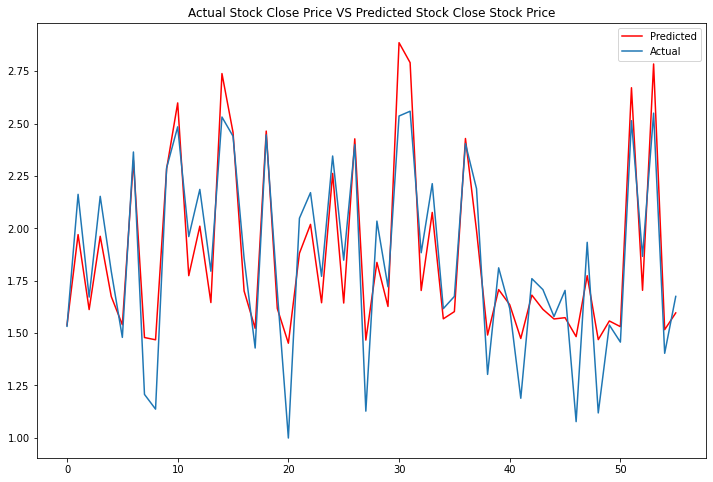

In [60]:
# Call plot graph function to see the  difference in actual vs predicted values

plot_graph(Y_pred_linear)
plt.show()

# Conclusion:-
 After implementing Linear Regression:
 * Mean Square Error is approximately 0.032 
 * Adjusted RSquare is approximately 0.8212
 * Mean Absolute Precentage Error is 0.0918 % 

#2.Lasso Regression

In [61]:
# Implement Lasso algorithm 
# Set hyperparameter  alpha value and fix maximum number of iteration 

lasso  = Lasso(alpha=0.0001 , max_iter= 3000)

In [62]:
# Fit the model

lasso.fit(X_train, Y_train)

Lasso(alpha=0.0001, max_iter=3000)

In [63]:
# Finding the score from training data 

lasso.score(X_train, Y_train)

0.8089703663549027

In [64]:
# Printing cofficients 

lasso.coef_

array([-0.14166158,  0.28810313,  0.24336818])

In [65]:
# Predicting the values of Y(dependent variable) on the basis of test data

Y_pred_lasso = lasso.predict(X_test)

In [66]:
# Printing Y predicted values in array form

Y_pred_lasso

array([1.53888941, 1.9716249 , 1.61386233, 1.96221494, 1.67375724,
       1.53949216, 2.32503682, 1.47905275, 1.46840057, 2.27786714,
       2.60090975, 1.77571807, 2.01071787, 1.64616432, 2.74109941,
       2.45322019, 1.70106593, 1.52258908, 2.458541  , 1.61770343,
       1.45195878, 1.88047283, 2.01900575, 1.64444524, 2.26129476,
       1.63965307, 2.42788425, 1.46700001, 1.83768019, 1.62816713,
       2.88448101, 2.78166181, 1.70249724, 2.07675191, 1.56807427,
       1.60293062, 2.42888698, 1.98937829, 1.49046925, 1.70846008,
       1.63498081, 1.47368256, 1.67775274, 1.61327041, 1.56731071,
       1.57400975, 1.48374863, 1.77424712, 1.4691301 , 1.55840437,
       1.53100546, 2.67028126, 1.70373092, 2.77935902, 1.51603533,
       1.59549704])

In [67]:
# Adding one column in test dataframe to see the difference between actual and predicted values

test_df['Lasso Predicted Closing Price'] = Y_pred_lasso
lasso_df = test_df.loc[:,['Actual Closing Price','Lasso Predicted Closing Price']]
lasso_df.head(5)

,Actual Closing Price,Lasso Predicted Closing Price
Date,,
2008-04-01,1.532245,1.538889
2015-12-01,2.162056,1.971625
2019-12-01,1.671636,1.613862
2014-11-01,2.152533,1.962215
2010-08-01,1.793930,1.673757


In [68]:
# Inserting metrices for Lasso Regression
evaluation_metrices_df.loc[i,"Model_Name"]='Lasso regression'

# Calling evaluation matrix function for Lasso Regression
evaluation_metrics(Y_pred_lasso)
i+=1  # i is a incremented variable

Mean Squared Error:  0.03252125590098214
Root Mean Squared Error:  0.1803365073993121
R2:  0.8314304405005268
Adjusted R2:  0.8217052736063265
Mean Absolute Percentage Error:  0.0918  %


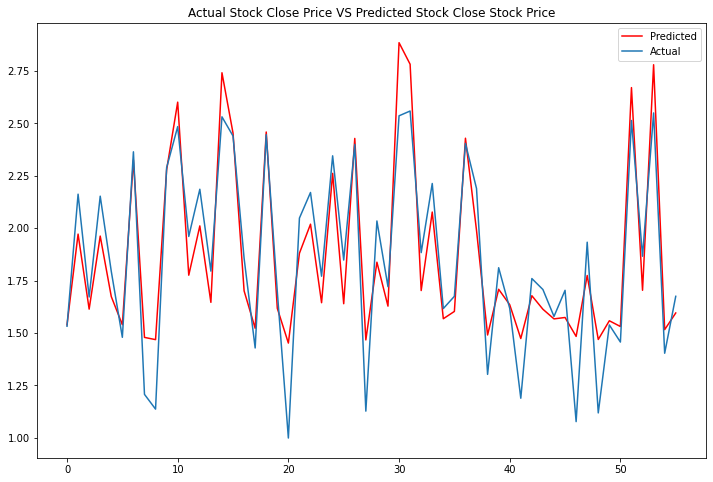

In [69]:
# Call plot graph function to see the  difference in actual vs predicted values

plot_graph(Y_pred_lasso)

# Conclusion:-
 After implementing Lasso Regression:
 * Mean Square Error is approximately 0.032 
 * Adjusted RSquare is approximately 0.8217
 * Mean Absolute Precentage Error is 0.0918 % 

#3.Cross Validation in Lasso Regression

* **Cross Validation :** In cross validation ,We divide our dataset into 3 parts training, validation and testing. The testing data is only for the final check, train and validation is used for the hyper parameter tuning in order to avoid the data leakage.


In [70]:
# Using Cross validation while implementing lasso regression

from sklearn.model_selection import GridSearchCV # Importing GridSearchCV for implementing cross validation
lasso = Lasso() # Creating lasso object

# estimating different alpha values and cross validation(cv) value is 5
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100,0.0014]} 
lasso_regressor = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=5)   
lasso_regressor.fit(X_train, Y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100, 0.0014]},
             scoring='neg_mean_squared_error')

* Total alpha values are 21 and cross validation i.e cv.It means our model will run 105 times [21*5=105].This is called GridSearchCV.

In [71]:
# Finding bext alpha value to fit the model

print("The best fit alpha value is found out to be :" ,lasso_regressor.best_params_)
print("\nUsing ",lasso_regressor.best_params_, " the negative mean squared error is: ", lasso_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 0.01}

Using  {'alpha': 0.01}  the negative mean squared error is:  -0.03647994964082519


In [72]:
# Predicting the values of Y(dependent variable) on the basis of test data

Y_pred_lasso_cv = lasso_regressor.predict(X_test)

In [73]:
# Adding one column in test dataframe to see the difference between actual and predicted values

test_df['Lasso Predicted Cross Validation Price'] = Y_pred_lasso_cv
lasso_df = test_df.loc[:,['Actual Closing Price','Lasso Predicted Cross Validation Price']]
lasso_df.head(5)

,Actual Closing Price,Lasso Predicted Cross Validation Price
Date,,
2008-04-01,1.532245,1.550113
2015-12-01,2.162056,1.981170
2019-12-01,1.671636,1.632594
2014-11-01,2.152533,1.961702
2010-08-01,1.793930,1.673006


In [74]:
# Inserting metrices for Lasso Regression CV
evaluation_metrices_df.loc[i,"Model_Name"]='Lasso Regression CV'

#  Calling evaluation matrix function for Lasso Regression with Cross validation
evaluation_metrics(Y_pred_lasso_cv)
i+=1 # i is a incremented variable

Mean Squared Error:  0.03212396754825271
Root Mean Squared Error:  0.1792316030956949
R2:  0.8334897312861527
Adjusted R2:  0.8238833696295845
Mean Absolute Percentage Error:  0.0923  %


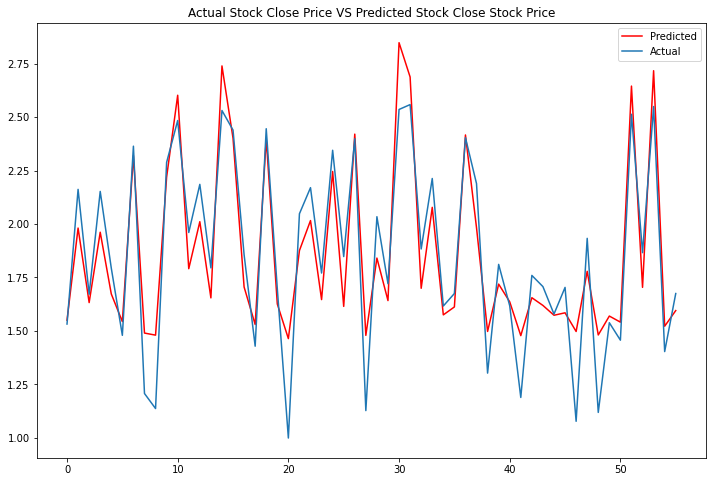

In [75]:
# Call plot graph function to see the  difference in actual vs predicted values

plot_graph(Y_pred_lasso_cv)

# Conclusion:-
 After implementing Lasso Regression with CV:
 * Mean Square Error is approximately 0.032 
 * Adjusted RSquare is approximately 0.823
 * Mean Absolute Precentage Error is 0.0923 % 

# 4.Ridge Regression with Cross Validation

In [76]:
# Implementing Ridge regression with CV

ridge = Ridge() # creating object

# estimating different alpha values and cross validation(cv) value is 3

parameters = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1,5,10,20,30,40,45,50,55,60,100]}
ridge_regressor = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=3)
ridge_regressor.fit(X_train,Y_train)

GridSearchCV(cv=3, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 1e-05, 0.0001, 0.001,
                                   0.01, 1, 5, 10, 20, 30, 40, 45, 50, 55, 60,
                                   100]},
             scoring='neg_mean_squared_error')

In [77]:
# Finding bext alpha value to fit the model

print("The best fit alpha value is found out to be :" ,ridge_regressor.best_params_)
print("\nUsing ",ridge_regressor.best_params_, " the negative mean squared error is: ", ridge_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 5}

Using  {'alpha': 5}  the negative mean squared error is:  -0.0389969187602811


In [78]:
# Predicting the values of Y(dependent variable) on the basis of test data

Y_pred_ridge = ridge_regressor.predict(X_test)

In [79]:
# Adding one column in test dataframe to see the difference between actual and predicted values

test_df['Ridge Predicted Closing Price'] = Y_pred_ridge
ridge_df = test_df.loc[:,['Actual Closing Price','Ridge Predicted Closing Price']]
ridge_df.tail(5)

,Actual Closing Price,Ridge Predicted Closing Price
Date,,
2017-04-01,2.513404,2.645532
2012-03-01,1.866051,1.699645
2018-01-01,2.549555,2.708131
2006-11-01,1.403464,1.517197
2009-10-01,1.674953,1.590675


In [80]:
# Inserting metrices for Ridge Regression CV
evaluation_metrices_df.loc[i,"Model_Name"]='Ridge Regression CV'

# Calling evaluation matrix function for Ridge Regression with Cross validation
evaluation_metrics(Y_pred_ridge)
i+=1 # i is a incremented variable

Mean Squared Error:  0.03200587161353412
Root Mean Squared Error:  0.17890184910596682
R2:  0.834101865693102
Adjusted R2:  0.8245308194830886
Mean Absolute Percentage Error:  0.0922  %


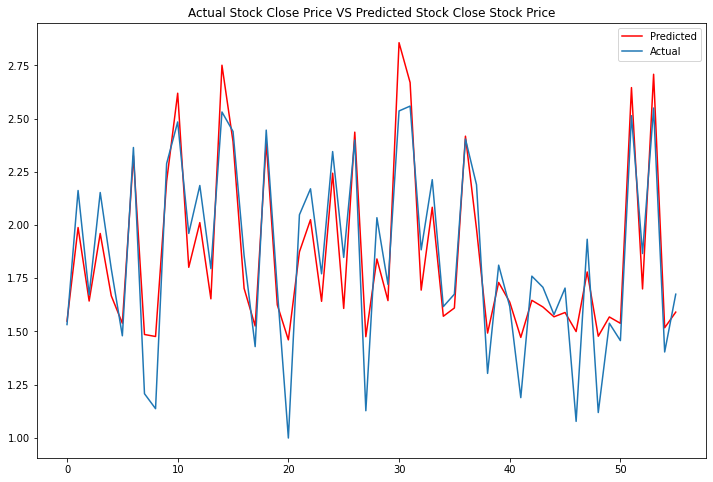

In [81]:
# Call plot graph function to see the  difference in actual vs predicted values

plot_graph(Y_pred_ridge)

# Conclusion:-
 After implementing Ridge Regression with CV:
 * Mean Square Error is approximately 0.0317 
 * Adjusted RSquare is approximately 0.814
 * Mean Absolute Precentage Error is 0.092 % 

# 5.Elastic Net using Cross Validation

In [82]:
# Implement Elastic Net with CV
# Elastic Net is a combination of Lasso and Ridge regression 

elastic = ElasticNet()  # Creating object 

# estimating different alpha values and cross validation(cv) value is 5
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100],'l1_ratio':[0.3,0.4,0.5,0.6,0.7,0.8]}
elastic_regressor = GridSearchCV(elastic, parameters, scoring='neg_mean_squared_error',cv=5)
elastic_regressor.fit(X_train, Y_train)

GridSearchCV(cv=5, estimator=ElasticNet(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100],
                         'l1_ratio': [0.3, 0.4, 0.5, 0.6, 0.7, 0.8]},
             scoring='neg_mean_squared_error')

In [83]:
# Finding bext alpha  and l1 ratio value to fit the model

print("The best fit alpha value is found out to be :" ,elastic_regressor.best_params_)
print("\nUsing ",elastic_regressor.best_params_, " the negative mean squared error is: ", elastic_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 0.01, 'l1_ratio': 0.6}

Using  {'alpha': 0.01, 'l1_ratio': 0.6}  the negative mean squared error is:  -0.03641540663708944


In [84]:
# Predicting the values of Y(dependent variable) on the basis of test data

Y_pred_elastic = elastic_regressor.predict(X_test)

In [85]:
# Adding one column in test dataframe to see the difference between actual and predicted values

test_df['Elastic Net Predicted Closing Price'] = Y_pred_elastic
relastic_cv_df = test_df.loc[:,['Actual Closing Price','Elastic Net Predicted Closing Price']]
relastic_cv_df.head(5)

,Actual Closing Price,Elastic Net Predicted Closing Price
Date,,
2008-04-01,1.532245,1.547587
2015-12-01,2.162056,1.982409
2019-12-01,1.671636,1.631532
2014-11-01,2.152533,1.962446
2010-08-01,1.793930,1.671508


In [86]:
# Inserting metrices for Elastiv Net CV
evaluation_metrices_df.loc[i,"Model_Name"]='Elastiv Net CV'

# Calling evaluation matrix function for Elastic Net with Cross validation
evaluation_metrics(Y_pred_elastic)
i+=1 # i is a incremented variable

Mean Squared Error:  0.03209876094409088
Root Mean Squared Error:  0.1791612707704734
R2:  0.833620386331363
Adjusted R2:  0.8240215624658648
Mean Absolute Percentage Error:  0.0922  %


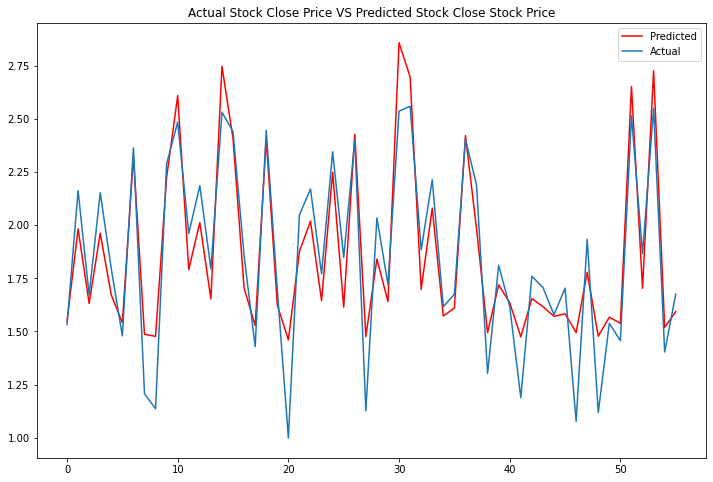

In [87]:
# Call plot graph function to see the  difference in actual vs predicted values

plot_graph(Y_pred_elastic)


# Conclusion:-
 After implementing Elastic Net with CV:
 * Mean Square Error is approximately 0.032
 * Adjusted RSquare is approximately 0.824
 * Mean Absolute Precentage Error is 0.0922 % 

#6.KNeighbour Regressor

In [88]:
# Import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor

#Setup arrays to store training and test accuracies
neighbors = np.arange(1,9)
train_accuracy =np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    # Setup a knn classifier with k neighbors
    knn = KNeighborsRegressor(n_neighbors=k)
    
    # Fit the model
    knn.fit(X_train, Y_train)
    
    # Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, Y_train)
    
    # Compute accuracy on the test set
    test_accuracy[i] = knn.score(X_test, Y_test) 

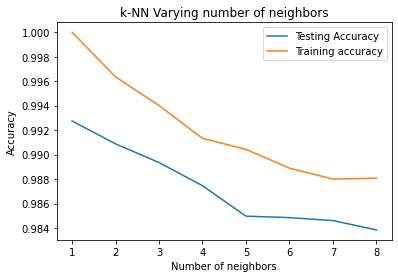

In [89]:
# Generate plot

plt.title('k-NN Varying number of neighbors')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

**The above graph showing the number of neighbour varying according to the training and test data.**

In [90]:
# Setup a knn classifier with k neighbors
knn = KNeighborsRegressor(n_neighbors=5)

In [91]:
# Fit the model
knn.fit(X_train,Y_train)

KNeighborsRegressor()

In [92]:
knn.score(X_test,Y_test)

0.9849667212324535

In [93]:
# Let us get the predictions using the regressor we had fit above
Y_pred_knn = knn.predict(X_test)

In [94]:
# Adding one column in test dataframe to see the difference between actual and predicted values

test_df['KNN Predicted Closing Price'] = Y_pred_knn
KNN_df = test_df.loc[:,['Actual Closing Price','KNN Predicted Closing Price']]
KNN_df.head(5)

,Actual Closing Price,KNN Predicted Closing Price
Date,,
2008-04-01,1.532245,1.533379
2015-12-01,2.162056,2.179279
2019-12-01,1.671636,1.728682
2014-11-01,2.152533,2.179279
2010-08-01,1.793930,1.801372


In [95]:
# Inserting metrices for KNeighbour Regressor
evaluation_metrices_df.loc[i,"Model_Name"]='KNeighbour Regressor'

# Calling evaluation matrix function for KNeighbour Regressor
evaluation_metrics(Y_pred_knn)
i+=1  # i is a incremented variable

Mean Squared Error:  0.002900292954919346
Root Mean Squared Error:  0.0538543680207961
R2:  0.9849667212324535
Adjusted R2:  0.984099416688172
Mean Absolute Percentage Error:  0.0213  %


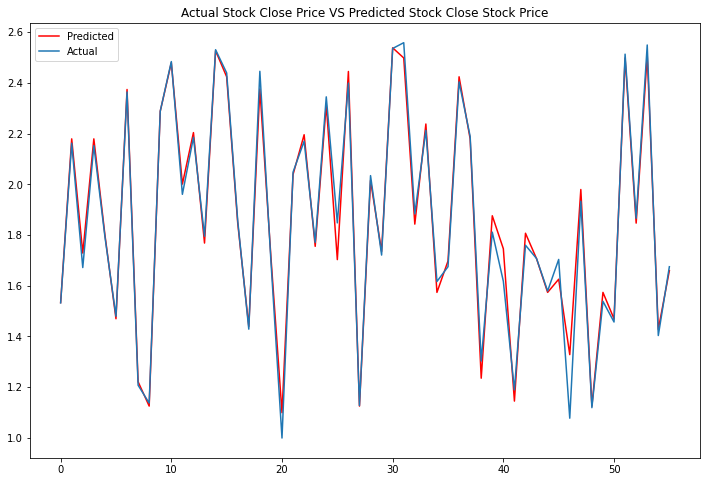

In [96]:
# Call plot graph function to see the  difference in actual vs predicted values

plot_graph(Y_pred_knn)


# Conclusion:-
 After implementing KNeighbour Regressor:
 * Mean Square Error is approximately 0.002
 * Adjusted RSquare is approximately 0.984
 * Mean Absolute Precentage Error is 0.0213 % 

# 7.Using Cross Validation in KNeighbour Regressor

In [97]:
# Use Cross Validation with KNeighbour Regressor
# In case of knn CV the parameter to be tuned is n_neighbors

param_grid = {'n_neighbors':np.arange(1,50)}

In [98]:
# Implement KNR with CV
knn = KNeighborsRegressor()
# no. of cv=10
knn_cv= GridSearchCV(knn,param_grid,cv=10)
# Fit the model
knn_cv.fit(X,Y)

GridSearchCV(cv=10, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])})

In [99]:
# Predicted Values

y_pred_knn_cv = knn_cv.predict(X_test)
y_pred_knn_cv

array([1.52621109, 2.1713784 , 1.68845981, 2.17227888, 1.80316335,
       1.45100458, 2.40107983, 1.22379502, 1.11920972, 2.31728081,
       2.4879478 , 1.96452501, 2.1713784 , 1.77823028, 2.53360968,
       2.41887621, 1.84996926, 1.42869343, 2.41887621, 1.71411397,
       1.07326953, 2.06232225, 2.1821027 , 1.75812942, 2.33970453,
       1.74963735, 2.40960706, 1.11920972, 2.01835373, 1.75521518,
       2.54608357, 2.53344871, 1.86160355, 2.22860131, 1.58295473,
       1.69549432, 2.40960706, 2.16954016, 1.2567502 , 1.86667549,
       1.70691229, 1.16350537, 1.75751455, 1.70024025, 1.58295473,
       1.62768751, 1.26253297, 1.96237698, 1.12417056, 1.58295473,
       1.45552717, 2.49478116, 1.86160355, 2.53344871, 1.4221109 ,
       1.65497509])

In [100]:
# Adding one column in test dataframe to see the difference between actual and predicted values

test_df['KNN Cross Validation Predicted Closing Price'] = y_pred_knn_cv
KNN_cv_df = test_df.loc[:,['Actual Closing Price','KNN Cross Validation Predicted Closing Price']]
KNN_cv_df.head(5)

,Actual Closing Price,KNN Cross Validation Predicted Closing Price
Date,,
2008-04-01,1.532245,1.526211
2015-12-01,2.162056,2.171378
2019-12-01,1.671636,1.688460
2014-11-01,2.152533,2.172279
2010-08-01,1.793930,1.803163


In [101]:
# Inserting metrices for KNeighbour Regressor CV
evaluation_metrices_df.loc[i,"Model_Name"]='KNeighbour Regressor CV'

# Calling evaluation matrix function for KNeighbour Regressor with Cross Validation
evaluation_metrics(y_pred_knn_cv)
i+=1  # i is a incremented variable

Mean Squared Error:  0.0015241010872501079
Root Mean Squared Error:  0.03903973728459386
R2:  0.9921000268349828
Adjusted R2:  0.9916442591523856
Mean Absolute Percentage Error:  0.0158  %


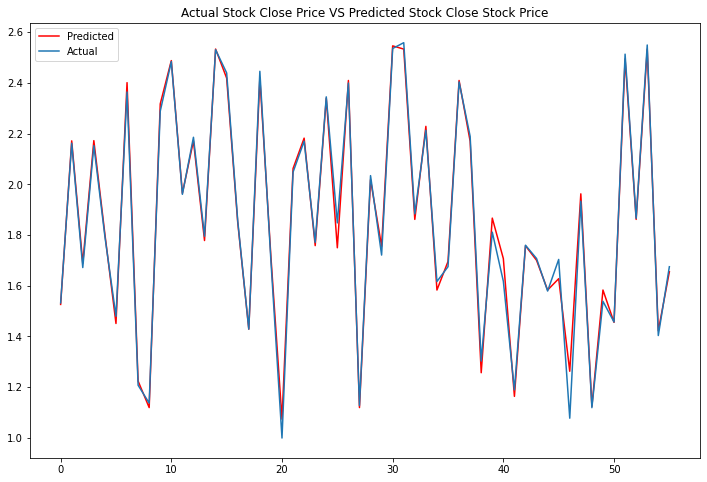

In [102]:
# Call plot graph function to see the  difference in actual vs predicted values

plot_graph(y_pred_knn_cv)

# Conclusion:-
 After implementing KNeighbour Regressor with CV:
 * Mean Square Error is approximately 0.0015
 * Adjusted RSquare is approximately 0.99
 * Mean Absolute Precentage Error is 0.0158 % 

# Creating table of Evaluation Metrices for each model 

In [103]:
evaluation_metrices_df

,Model_Name,MSE,RMSE,R2,Adjusted R2,MAPE
0,Linear regression,0.0326,0.1806,0.8310,0.8213,0.0918
1,Lasso regression,0.0325,0.1803,0.8314,0.8217,0.0918
2,Lasso Regression CV,0.0321,0.1792,0.8335,0.8239,0.0923
3,Ridge Regression CV,0.0320,0.1789,0.8341,0.8245,0.0922
4,Elastiv Net CV,0.0321,0.1792,0.8336,0.8240,0.0922
7,KNeighbour Regressor,0.0029,0.0539,0.9850,0.9841,0.0213
8,KNeighbour Regressor CV,0.0015,0.0390,0.9921,0.9916,0.0158


# Over all graphical representation between Actual Closing Price and Predicted Closing Price by All Algorithms

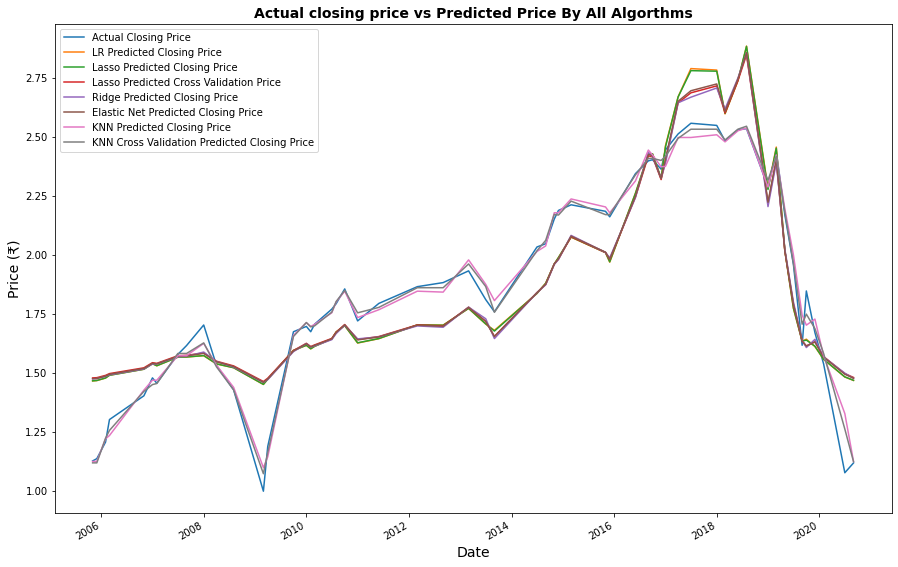

In [106]:
# Graph between Actual Close price and Predicted Price by All Algorithms

test_df.plot(figsize = (15,10))
plt.xlabel('Date',fontsize = 14)
plt.ylabel('Price (₹)',fontsize = 14)
plt.title('Actual closing price vs Predicted Price By All Algorthms',fontweight = 'bold',fontsize = 14)
plt.legend()
plt.show()

# Final Conclusion
* Target Variable is strongly dependent on Independent Variables. 

* We have seen that there is neither null nor duplicate values, But Date feature have values in object data type. So, we converted it into proper date format YYYY-MM-DD.

* KNeighbour Regressor and KnNeighbour Regressor CV performing better than other models with adjusted R^2 0.9841  and 0.9916 respectively.

*  With the help of visualization ,We check that from 2018 onwards there is sudden fall in the stock closing price. It makes sense how severly Rana Kapoor case fraud affected the price of Yes bank stocks.

*  With the help of distribution plot we see that our data is rightly skewed which doesn’t look good in viewing of statistical hyposthesis. So we apply some kind of transformation i.e. Log Transformation to convert it into a normal distribution.
*